<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/EX_7_6_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%88%98%EC%97%BC_%EC%8A%A4%ED%8B%B0%EC%BB%A4_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATION_BS2

---
# 7. 카메라 스티커앱 만들기 첫걸음

---

---
## 7-6. 프로젝트: 고양이 수염 스티커 만들기

---

In [36]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


---
### Step 1. 스티커 구하기 or 만들기

---

▣ 고양이 수염 이미지

https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1

---
### Step 2. 얼굴 검출 & 랜드마크 검출 하기

---

In [37]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

print(cv2.__version__)
print(dlib.__version__)

🌫🛸
4.6.0
19.24.0



[ LMS ]

    cv2  : 4.5.3

    dlib : 19.22.1

[ Colab ]

    cv2  : 4.6.0

    dlib : 19.24.0

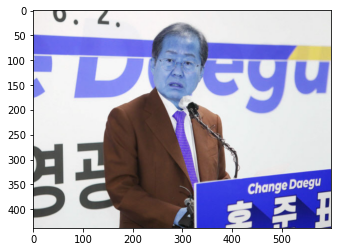

In [38]:
# my_image_path = os.getenv('Home')+'/aiffel/camera_sticker/images/image.png'
from os.path import join
DIR_img = '/content/drive/MyDrive/_aiffel/aiffel/camera_sticker/images'
#my_image_path = join(DIR_img, 'image.png')
#my_image_path = join(DIR_img, 'batman.png')
my_image_path = join(DIR_img, '홍준표.jpg')
img_bgr = cv2.imread(my_image_path) # OpenCV로 이미지를 read
img_show = img_bgr.copy()           # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

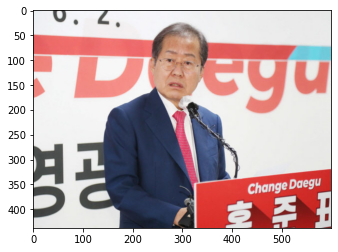

In [39]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

---
### Step 3. 스티커 적용 위치 확인하기

---

In [40]:
# dlib을 활용해 hog detector를 선언
# dlib.get_frontal_face_detector()
detector_hog = dlib.get_frontal_face_detector() # 전면 얼굴 탐지기
print("🌫🛸")

🌫🛸


In [41]:
# detector_hog를 이용해서 얼굴의 bounding box를 추출

# dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서,
# opencv 의 bgr 이미지를 rgb로 변환해 주어야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # 4
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(235, 80) (342, 187)]]


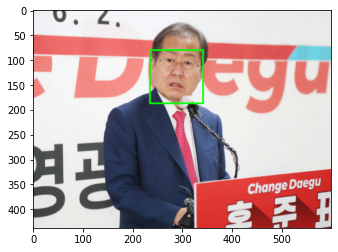

In [42]:
# dlib
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다.
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()    # x1    l = 345
    t = dlib_rect.top()     # y1    t = 98
    r = dlib_rect.right()   # x2    r = 531
    b = dlib_rect.bottom()  # y2    b = 284

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()

고양이 수염이 적용 될 위치를 landmark를 사용해서 계산

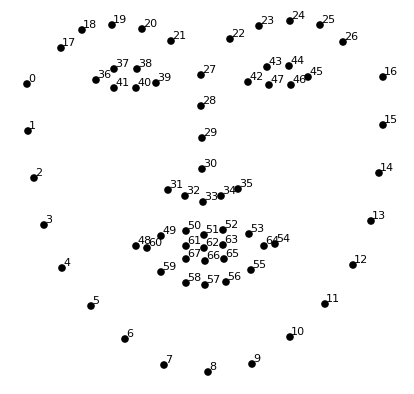

https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png

---

저장한 landmark 모델을 불러옵니다.

In [43]:
# model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
from os.path import join
DIR_model = '/content/drive/MyDrive/_aiffel/aiffel/camera_sticker/models'
path_dat = join(DIR_model, 'shape_predictor_68_face_landmarks.dat')
landmark_predictor = dlib.shape_predictor(path_dat)
print("🌫🛸")

🌫🛸


landmark_predictor 는,<br>
RGB 이미지와 dlib.rectangle을 입력 받아,<br>
dlib.full_object_detection 를 반환합니다.<br>

In [44]:
# landmark_predictor 는,
# RGB 이미지와 dlib.rectangle을 입력 받아,
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다.<br>
조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.<br>
따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다.<br>
이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.

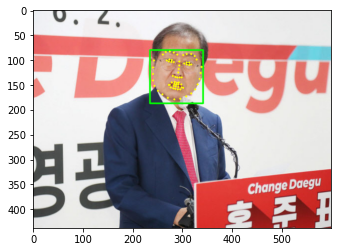

In [45]:
# 랜드마크를 영상에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

---
### Step 4. 스티커 적용하기

---

In [46]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    #x = landmark[30][0]
    #y = landmark[30][1] - dlib_rect.height()//2

    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[36][0])*2
    h = (landmark[48][1] - landmark[2][1])*2

    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(292, 125)
(x,y) : (292,125)
(w,h) : (108,108)


In [47]:
# sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
from os.path import join
DIR_img = '/content/drive/MyDrive/_aiffel/aiffel/camera_sticker/images'
#sticker_path = join(DIR_img, 'king.png')
sticker_path = join(DIR_img, 'cat-whiskers.png')
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(108, 108, 3)


In [48]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (238,71)


In [49]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (238,71)


In [50]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


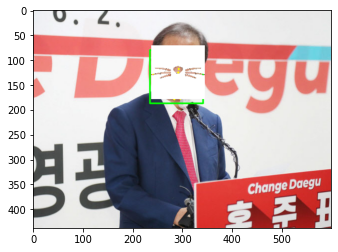

In [51]:
# bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
# img_show 대신, 지금까지 아껴 두었던 img_bgr을 활용할 것입니다.
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

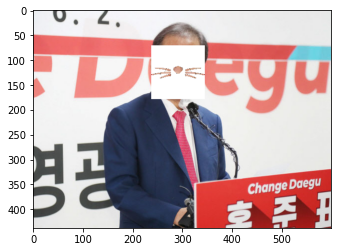

In [52]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

---
## 회고

---
http://dlib.net/ 에서<br>
dlib-19.24.zip 화일을 받아 PC에 설치해 보았으나,<br>
유니코드 문제로 컴파일 중 에러가 발생하여 못하고,<br>
Windows 10 에서 Windows Subsystem for Linux (WSL)을 지원한다고 하여,<br>
Ubuntu를 설치하고 시도해 보았으나 여전히 에러가 발생하여,
PC에서는 돌려보지 못하였습니다.<br>
Colab에서는 최신 버전인 19.24를 지원하여,<br>
import dlib 만 선언해주면, 사용할 수 있어서, 편리했습니다.



